In [1]:
import pandas as pd 
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from pylab import rcParams
import warnings
from pandas.core.nanops import nanmean as pd_nanmean
import scipy
from scipy import stats
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')
%matplotlib inline

# Первичный анализ данных

Данные о преступности в Денвере, взяты с сайта 
https://www.kaggle.com/paultimothymooney/denver-crime-data

Набор данных включает уголовные преступления в городе и округе Денвер за предыдущие пять календарных лет плюс текущий год до настоящего времени. Данные основаны на Национальной системе отчетности об инцидентах (NIBRS)

Цель проекта: проанализировать датасет, проверить поставленные гипотезы и построить прогноз.

In [2]:
df = pd.read_csv('denver-crime-data/crime.csv', sep =',')
df.head(10)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0
5,2018264446,2018264446131600,1316,0,threats-to-injure,public-disorder,3/29/2018 10:00:00 AM,4/17/2018 10:00:00 AM,4/20/2018 1:33:00 PM,1865 LARIMER ST,3142086.0,1699093.0,-104.994668,39.751731,6,612,union-station,1,0
6,2016461725,2016461725549900,5499,0,traf-other,all-other-crimes,7/21/2016 6:40:00 PM,NaN,7/21/2016 7:09:00 PM,N COLUMBINE ST / E 48TH AVE,3152605.0,1710822.0,-104.957009,39.783762,2,212,elyria-swansea,1,0
7,2017409119,2017409119549900,5499,0,traf-other,all-other-crimes,6/22/2017 5:20:00 PM,NaN,6/22/2017 5:20:00 PM,E COLFAX AVE / N DOWNING ST,3148176.0,1694866.0,-104.973097,39.740032,6,623,capitol-hill,1,0
8,2018473421,2018473421739902,7399,2,public-order-crimes-other,all-other-crimes,7/13/2018 8:22:00 AM,NaN,7/13/2018 10:11:00 AM,777 N BANNOCK ST,3143312.0,1690483.0,-104.990480,39.728076,1,123,lincoln-park,1,0
9,2016829592,2016829592110200,1102,0,sex-aslt-rape,sexual-assault,12/30/2016 11:00:00 PM,12/30/2016 11:45:00 PM,12/31/2016 4:59:00 AM,NaN,NaN,NaN,NaN,NaN,6,611,five-points,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480285 entries, 0 to 480284
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INCIDENT_ID             480285 non-null  int64  
 1   OFFENSE_ID              480285 non-null  int64  
 2   OFFENSE_CODE            480285 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  480285 non-null  int64  
 4   OFFENSE_TYPE_ID         480285 non-null  object 
 5   OFFENSE_CATEGORY_ID     480285 non-null  object 
 6   FIRST_OCCURRENCE_DATE   480285 non-null  object 
 7   LAST_OCCURRENCE_DATE    152169 non-null  object 
 8   REPORTED_DATE           480285 non-null  object 
 9   INCIDENT_ADDRESS        435056 non-null  object 
 10  GEO_X                   476121 non-null  float64
 11  GEO_Y                   476121 non-null  float64
 12  GEO_LON                 476121 non-null  float64
 13  GEO_LAT                 476121 non-null  float64
 14  DISTRICT_ID         

Данные содержат 19 столбцов. Я собираюсь рассматривать в дальнейшем:

INCIDENT_ID-идентификатор инцидента

OFFENSE_TYPE_ID-краткое описание инцидента

FIRST_OCCURRENCE_DATE-дата и время инцидента

INCIDENT_ADDRESS-адрес

DISTRICT_ID-район

NEIGHBORHOOD_ID

IS_CRIME      

IS_TRAFFIC

Таблица содержит данные 2015-2020 годов

# Предобработка данных

Уберем столбцы с лишней информацией(дата отчета, коды)

In [4]:
df = df.drop(['OFFENSE_ID', 'OFFENSE_CODE','OFFENSE_CODE_EXTENSION','GEO_X','GEO_Y','GEO_LON','GEO_LAT','REPORTED_DATE'], axis=1)

Отсортируем строки по дате, когда был зафиксирован инцидент

In [5]:
df.sort_values('FIRST_OCCURRENCE_DATE',axis = 0,inplace =True)
df = df.iloc[:]
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df.FIRST_OCCURRENCE_DATE,format='%m/%d/%Y %I:%M:%S %p') 
df.head(20)

,INCIDENT_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,INCIDENT_ADDRESS,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
478192,2015729,traffic-accident,traffic-accident,2015-01-01 10:00:00,NaN,W 6TH AVE / I25 HWYNB,3,311,baker,0,1
479961,20152180,theft-items-from-vehicle,theft-from-motor-vehicle,2015-01-01 22:00:00,1/2/2015 8:00:00 AM,1323 N MARIPOSA ST,1,123,lincoln-park,1,0
477906,20151931,theft-of-motor-vehicle,auto-theft,2015-01-01 22:00:00,1/2/2015 2:45:00 AM,3215 W 18TH AVE,1,121,west-colfax,1,0
476073,201519308,burglary-business-by-force,burglary,2015-01-01 22:00:00,1/11/2015 2:48:00 AM,4275 W FLORIDA AVE,4,421,mar-lee,1,0
479630,20151614,traffic-accident,traffic-accident,2015-01-01 22:10:00,NaN,NaN,6,622,cheesman-park,0,1
477853,20156000029,theft-items-from-vehicle,theft-from-motor-vehicle,2015-01-01 22:15:00,1/2/2015 12:00:00 PM,4800 BLK N QUITMAN ST,1,111,regis,1,0
479265,20151623,traf-other,all-other-crimes,2015-01-01 22:16:00,NaN,I70 HWYEB / N HAVANA ST,5,512,stapleton,1,0
476848,20155001426,violation-of-court-order,all-other-crimes,2015-01-01 10:24:00,NaN,10500 E SMITH RD,5,512,stapleton,1,0
480007,2015738,traffic-accident,traffic-accident,2015-01-01 10:25:00,NaN,NaN,4,421,harvey-park,0,1
478916,20151640,traffic-accident-dui-duid,traffic-accident,2015-01-01 22:27:00,NaN,W ALAMEDA AVE / S BANNOCK ST,3,311,baker,0,1


# Визуальный анализ данных 

### 1. Сгруппируем количество преступлений по дням

In [6]:
df['crime or traffic']=1

In [7]:
 x = df.groupby([df['FIRST_OCCURRENCE_DATE'].dt.year,df["FIRST_OCCURRENCE_DATE"].dt.month,df['FIRST_OCCURRENCE_DATE'].dt.day])['crime or traffic'].count() 

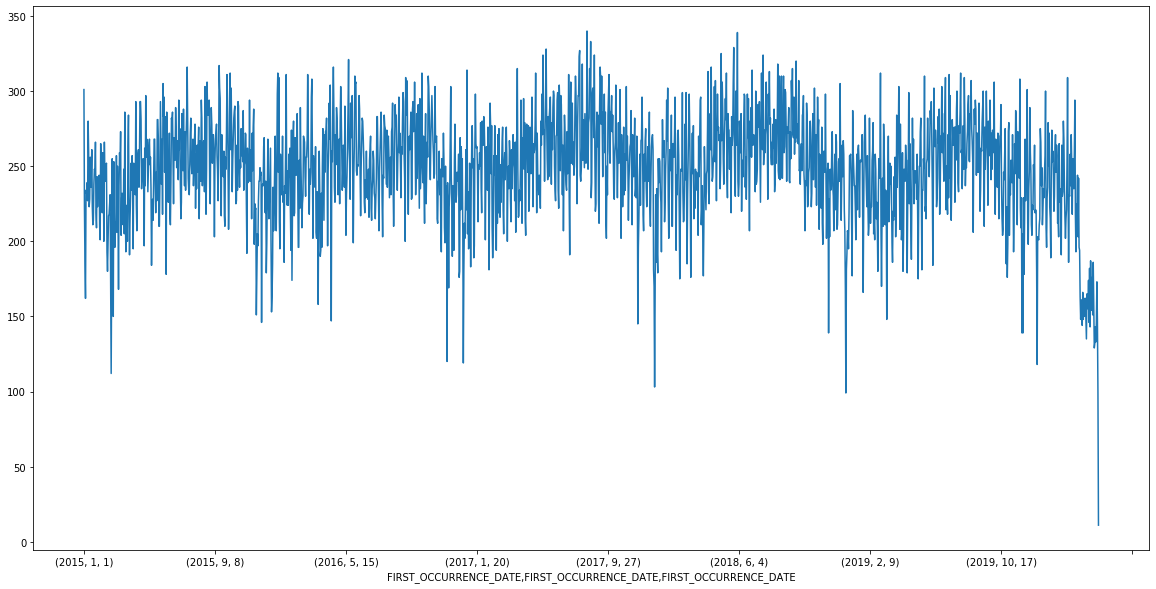

In [8]:
plt.figure(figsize=(20,10))
y = [i for i in x]
x.plot(figsize=(20,10)) 

### 2. Сезонность

In [9]:
year = []
for i in range(2015,2021):
    year.append(df[df['FIRST_OCCURRENCE_DATE'].dt.year==i].groupby(df["FIRST_OCCURRENCE_DATE"].dt.month)['crime or traffic'].count())

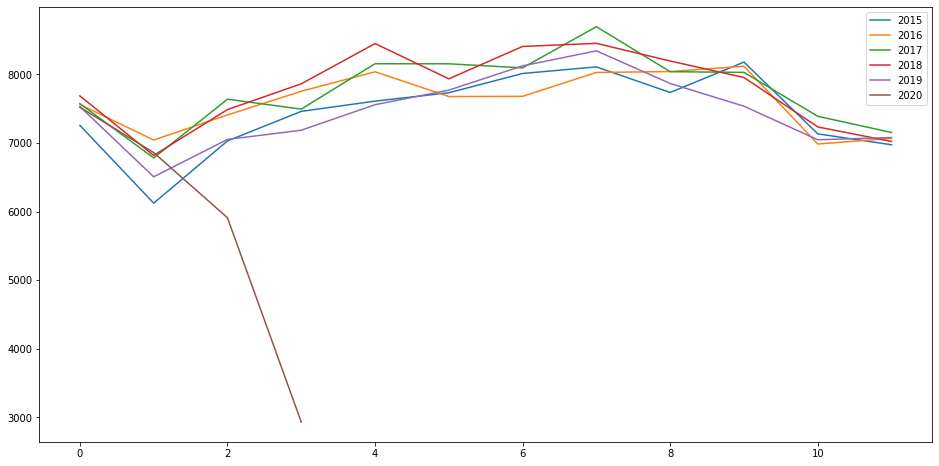

In [10]:
plt.figure(figsize=(16,8))
plt.plot(np.array(year[0].array), label='2015')
plt.plot(np.array(year[1].array), label='2016')
plt.plot(np.array(year[2].array), label='2017')
plt.plot(np.array(year[3].array), label='2018')
plt.plot(np.array(year[4].array), label='2019')
plt.plot(np.array(year[5].array), label='2020')
plt.legend()

По графику видна сезонность, летом происшествий больше, зимой меньше.

Заметно меньше происшествий в марте и апреле 2020, что скорее всего связано с значительным увеличением количеством людей, заболевших короновирусом в США

### 3. Тренд

In [11]:
y = df.groupby(pd.Grouper(key="FIRST_OCCURRENCE_DATE", freq="D"))['crime or traffic'].count() 

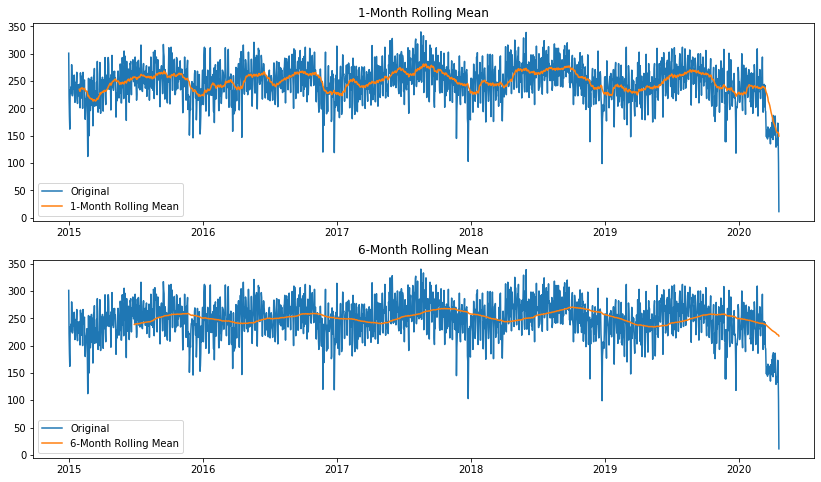

In [12]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

window = 30
axes[0].plot(y.index, y, label='Original')
axes[0].plot(y.index, y.rolling(window=window).mean(), label='1-Month Rolling Mean')
axes[0].set_title("1-Month Rolling Mean")
axes[0].legend(loc='best')
window = 30*6
axes[1].plot(y.index, y, label='Original')
axes[1].plot(y.index, y.rolling(window=window).mean(), label='6-Month Rolling Mean')
axes[1].set_title("6-Month Rolling Mean")
axes[1].legend(loc='best')

### 4. Остатки

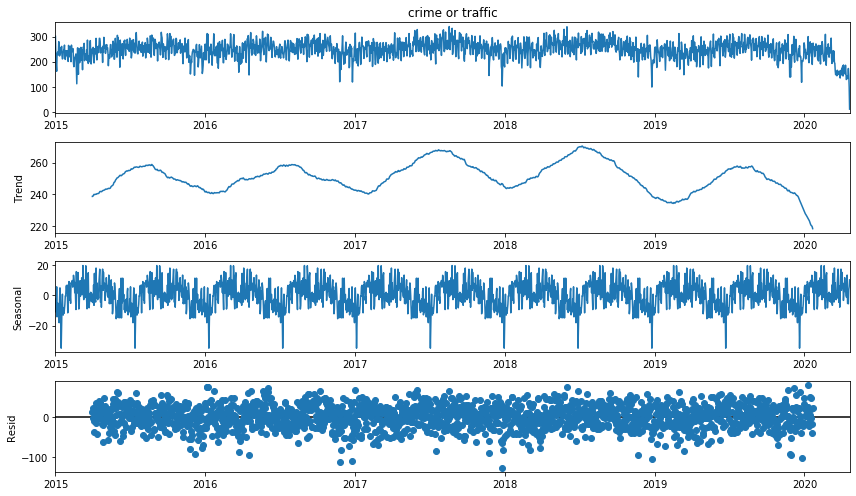

In [13]:
rcParams['figure.figsize'] = 12, 7
result = sm.tsa.seasonal_decompose(y, model='additive',freq= 30*6)
result.plot()
plt.show()

остаки напоминают белый шум, значит все нормально

### 5. Построим график количества инцидентов по месяцам и годам

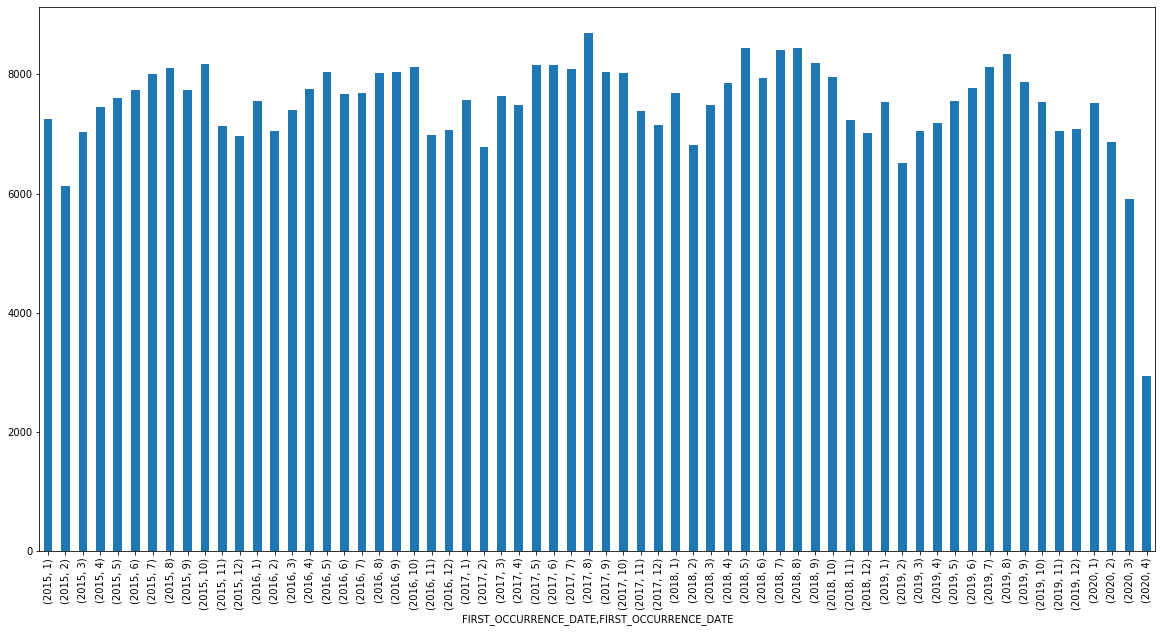

In [14]:
 df.groupby([df['FIRST_OCCURRENCE_DATE'].dt.year,df["FIRST_OCCURRENCE_DATE"].dt.month])['crime or traffic'].count().plot(kind="bar",figsize=(20,10)) 

### 6. Рассмотрим отдельно преступления и дорожные происшествия

#### Преступления:

In [15]:
 x = df.groupby([df['FIRST_OCCURRENCE_DATE'].dt.year,df["FIRST_OCCURRENCE_DATE"].dt.month,df['FIRST_OCCURRENCE_DATE'].dt.day])['crime or traffic'].count() 

In [17]:
df_crime = df[df.IS_CRIME==1]

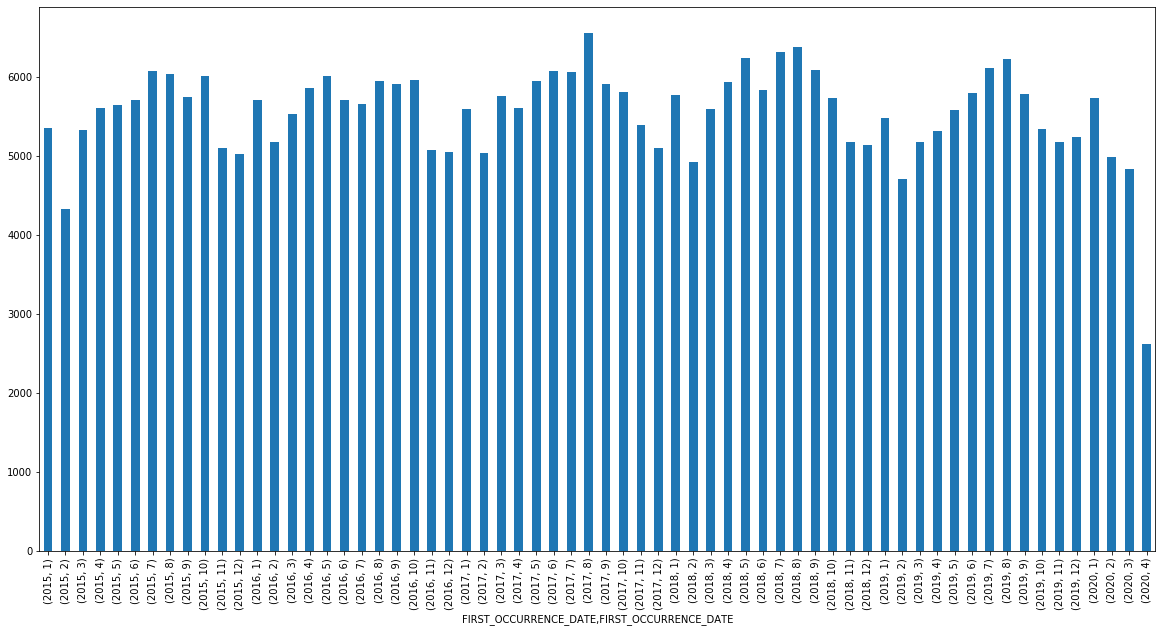

In [18]:
 df_crime.groupby([df_crime['FIRST_OCCURRENCE_DATE'].dt.year,df_crime["FIRST_OCCURRENCE_DATE"].dt.month])['IS_CRIME'].count().plot(kind="bar",figsize=(20,10)) 

количество преступлений снизилось в связи с коронавирусом, но не значительно

#### Дорожные происшествия:

In [19]:
df_traffic = df[df.IS_TRAFFIC==1]

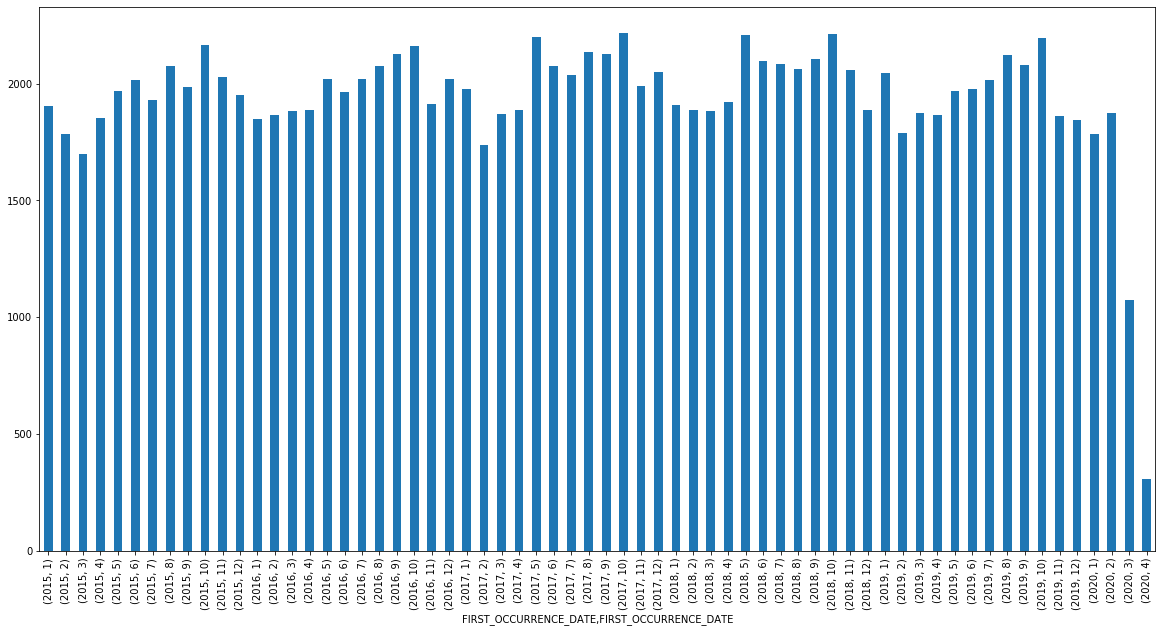

In [20]:
 df_traffic.groupby([df_traffic['FIRST_OCCURRENCE_DATE'].dt.year,df_traffic["FIRST_OCCURRENCE_DATE"].dt.month])['IS_TRAFFIC'].count().plot(kind="bar",figsize=(20,10)) 

а вот количество дорожных происшествий значительно уменьшилось

### 7. Посмотрим как количество происшествий зависит от дня недели

In [21]:
df['week_day'] = df['FIRST_OCCURRENCE_DATE'].dt.dayofweek

In [22]:
df_crime['week_day'] = df_crime['FIRST_OCCURRENCE_DATE'].dt.dayofweek

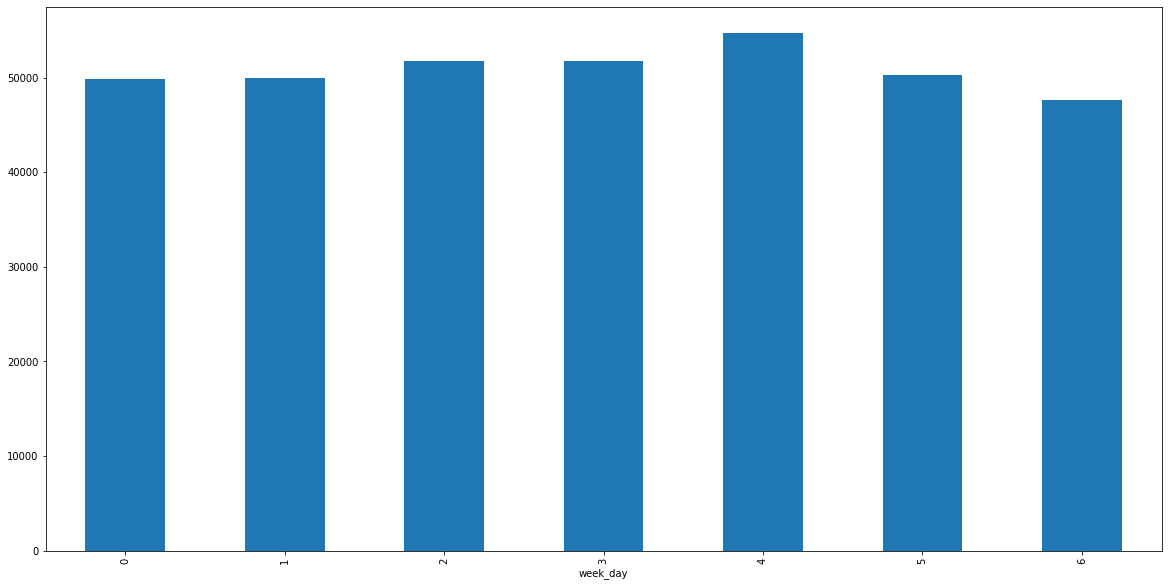

In [23]:
 df_crime.groupby(df_crime['week_day'])['IS_CRIME'].count().plot(kind="bar",figsize=(20,10)) 

нулевой день недели - понедельник

в пятницу больше всего происшествий, в воскресенье меньше всего.
Чем ближе к концу рабочей недели, тем больше происшествий

# Проверка статистических гипотез

### 1. Параметрический критерий

Проверим гипотезу о том, изменилось ли количество преступлений после смены президента. Для этого возьмем 2 года перед выборами и два года после.

H0: количество преступлений не изменилось

H1: количество преступлений изменилось

уровень значимости возьмем 0.05

Будем использовать критерий Стьюдента для несвязанных выборок

Для применения этого критерия нужно, чтобы выборки имели нормальное распределение. Убедимся в этом:

In [24]:
df_crime_2015_2016 = df[(df['FIRST_OCCURRENCE_DATE'].dt.year<2017)]

In [25]:
df_crime_2015_2016_day = df_crime_2015_2016.groupby(pd.Grouper(key="FIRST_OCCURRENCE_DATE", freq="D"))['IS_CRIME'].count()

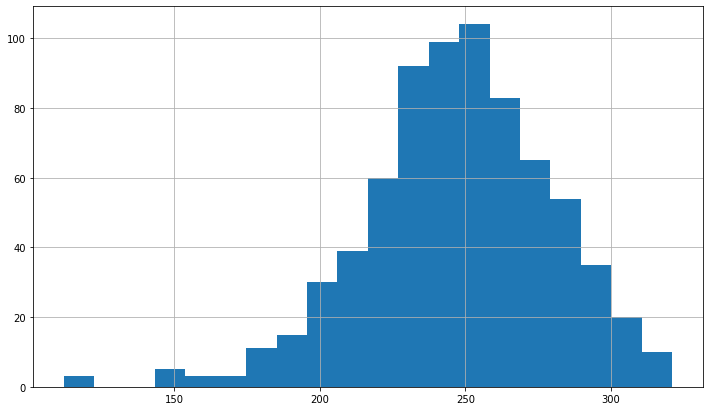

In [26]:
df_crime_2015_2016_day.hist(bins = 20)

In [27]:
from scipy.stats import norm,kstest
loc, scale = norm.fit(df_crime_2015_2016_day)

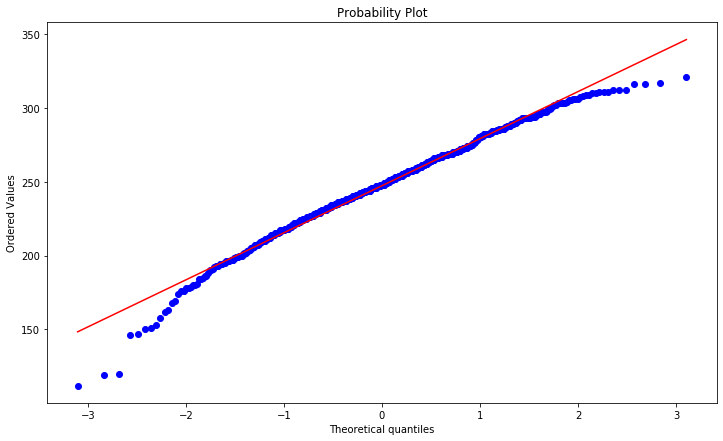

In [28]:
n = norm(loc=loc, scale=scale)
stats.probplot(df_crime_2015_2016_day, dist = "norm", plot = plt)
plt.show()

In [29]:
kstest(df_crime_2015_2016_day, n.cdf)


KstestResult(statistic=0.037329136895141, pvalue=0.25436061415299155)

In [30]:
df_crime_2017_2018 = df[(df['FIRST_OCCURRENCE_DATE'].dt.year>=2017)]

In [31]:
df_crime_2017_2018 = df_crime_2017_2018[(df_crime_2017_2018['FIRST_OCCURRENCE_DATE'].dt.year<2019)]

In [32]:
df_crime_2017_2018_day = df_crime_2017_2018.groupby(pd.Grouper(key="FIRST_OCCURRENCE_DATE", freq="D"))['IS_CRIME'].count()

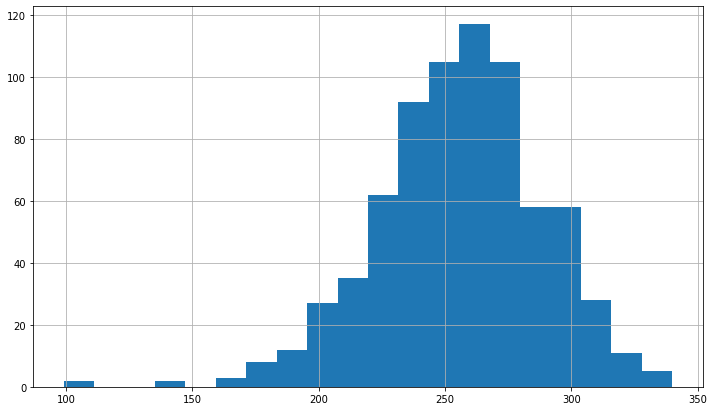

In [33]:
df_crime_2017_2018_day.hist(bins = 20)

In [34]:
loc, scale = norm.fit(df_crime_2017_2018_day)

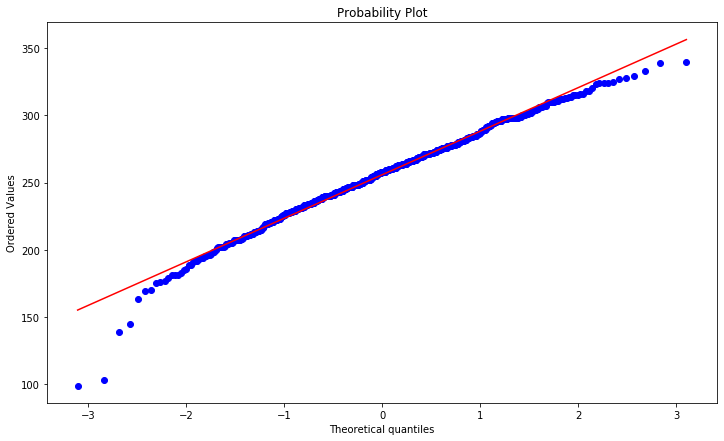

In [35]:
n = norm(loc=loc, scale=scale)
stats.probplot(df_crime_2017_2018_day, dist = "norm", plot = plt)
plt.show()

In [36]:
kstest(df_crime_2017_2018_day, n.cdf)

KstestResult(statistic=0.036057624903464036, pvalue=0.2925586817542454)

Итак, распределения выборок похожи на нормальное распределение и тесты это подтверждают, значит можно применять критерий

In [37]:
t_stat = stats.ttest_ind(df_crime_2015_2016_day,df_crime_2017_2018_day)
t_stat

Ttest_indResult(statistic=-5.0150523871989146, pvalue=5.951488711998708e-07)

pvalue меньше заданного уровня значимости, значит принимаем нулевую гипотезу

### 2. Непараметрический критерий

Возьмем два района Денвера и проверим одинаковое ли количество преступлений там происходит в одинаковые дни

Будем использовать критерий знаков для связанных выборок

уровень значимости возьмем 0.05

$ H0: P(X_1 > X_2) = \frac{1} {2}$

$ H1: P(X_1 > X_2) <> \frac{1} {2}$

In [38]:
stapleton =  df_crime[df_crime['NEIGHBORHOOD_ID']=='stapleton'].groupby([df_crime['FIRST_OCCURRENCE_DATE'].dt.year,df_crime["FIRST_OCCURRENCE_DATE"].dt.month,df_crime["FIRST_OCCURRENCE_DATE"].dt.day])['IS_CRIME'].count()

In [39]:
cbd =  df_crime[df_crime['NEIGHBORHOOD_ID']=='cbd'].groupby([df_crime['FIRST_OCCURRENCE_DATE'].dt.year,df_crime["FIRST_OCCURRENCE_DATE"].dt.month,df_crime["FIRST_OCCURRENCE_DATE"].dt.day])['IS_CRIME'].count()

In [40]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(np.array(cbd[:1933]) - np.array(stapleton))

(22.0, 0.30756402515279985)

Итак, отвергаем нулевую гипотезу

# Предсказание временного ряда

Построим предсказание количества преступлений на январь 2020 

In [43]:
y = df.groupby(pd.Grouper(key="FIRST_OCCURRENCE_DATE", freq="D"))['IS_CRIME'].count() 

In [44]:
y = y[y.index<'2020-02-01']

In [45]:
data = pd.DataFrame(y)

In [47]:
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
train = data[:len(data)-30]
val = data[len(data)-30:]
train['label'] = 'train'
val['label'] = 'val'

In [48]:
df1 = pd.concat((train,val), axis = 0)
df1['target'] = np.where(df1.label == 'train', df1.IS_CRIME, np.nan)
df1.head(2)

,IS_CRIME,label,target
FIRST_OCCURRENCE_DATE,,,
2015-01-01,301,train,301.0
2015-01-02,222,train,222.0


In [49]:
lag_period = 30
features = []
for period_mult in range(1,10,1):
    df1["lag_period_{}".format(period_mult)] = df1.target.shift(period_mult*lag_period)
    features.append("lag_period_{}".format(period_mult))

df1['lagf_mean'] = df1[features].mean(axis = 1)

features.extend(['lagf_mean'])
df1 = df1.drop('IS_CRIME', axis = 1)
model = LinearRegression()
train_df = df1[df1.label == 'train'][features + ['target']].dropna()
test_df = df1[df1.label == 'val'][features]

In [50]:
test_df

,lag_period_1,lag_period_2,lag_period_3,lag_period_4,lag_period_5,lag_period_6,lag_period_7,lag_period_8,lag_period_9,lagf_mean
FIRST_OCCURRENCE_DATE,,,,,,,,,,
2020-01-02,227.0,235.0,306.0,246.0,253.0,232.0,293.0,239.0,208.0,248.777778
2020-01-03,246.0,231.0,238.0,292.0,277.0,218.0,266.0,247.0,278.0,254.777778
2020-01-04,253.0,254.0,218.0,262.0,248.0,271.0,233.0,228.0,237.0,244.888889
2020-01-05,301.0,251.0,268.0,220.0,309.0,229.0,184.0,258.0,201.0,246.777778
2020-01-06,212.0,239.0,246.0,234.0,280.0,311.0,244.0,215.0,207.0,243.111111
2020-01-07,198.0,271.0,243.0,262.0,237.0,242.0,302.0,175.0,259.0,243.222222
2020-01-08,235.0,238.0,236.0,260.0,251.0,297.0,268.0,228.0,180.0,243.666667
2020-01-09,246.0,193.0,272.0,279.0,249.0,234.0,263.0,250.0,202.0,243.111111
2020-01-10,289.0,218.0,251.0,289.0,265.0,214.0,274.0,250.0,248.0,255.333333


In [51]:
model.fit(train_df.drop('target', axis = 1) ,train_df['target'])
forecast = model.predict(test_df)
test_df['prediction'] = forecast

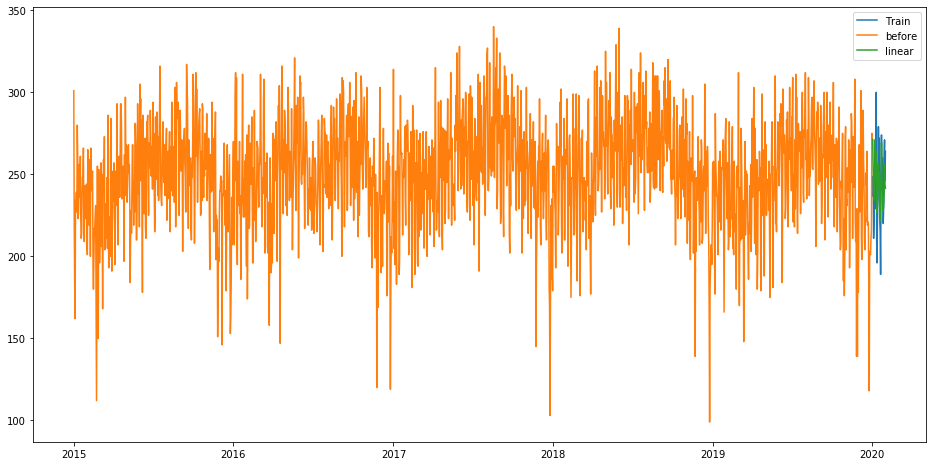

In [52]:
plt.figure(figsize=(16,8))
plt.plot(val.IS_CRIME, label='Train')
plt.plot(data[:len(data)-30], label='before')
plt.plot(test_df.prediction, label='linear')
plt.legend(loc='best')
plt.show()

In [53]:
import numpy as np

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [54]:
smape(forecast,val.IS_CRIME)

7.110287991654473

# Выводы

1.Есть сезонность, летом происшествий больше, зимой меньше.

2.Меньше происшествий в марте и апреле 2020, что скорее всего связано с коронавирусом(в большей степени падает количество дорожных происшествий)

3.В пятницу больше всего происшествий, в воскресенье меньше всего.

4.Проверена гипотеза о том, изменилось ли количество преступлений после смены президента. Не изменилось

5.Проверена гипотеза о том, одинаковое ли количество преступлений происходитв двух разных районах в одинаковые дни. Разное